## Logic Based FizzBuzz Function [Software 1.0]

In [1]:
def fizzbuzz(n):
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'
    


## Create Training and Testing Datasets in CSV Format

In [2]:
import pandas as pd
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [3]:
def processData(dataset):
    
    # Why do we have to process?
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [4]:
def encodeData(data):   ######？？？
    
    processedData = []
    
    for dataInstance in data:
        # Why do we have number 10?
        processedData.append([dataInstance >> d & 1 for d in range(10)])#for dimensionality in [0,9]:dataInstance>d
    
    return np.array(processedData)

In [5]:
import tensorflow as tf
from keras.utils import np_utils #Encoding  


def encodeLabel(labels):
    processedLabel = []
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):    # FizzBuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):     # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):    # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])
    #[0] stores the rest;[1] stores fizz;[2] stores buzz;[3] stores fizzbuzz
    return np_utils.to_categorical(np.array(processedLabel),4)

Using TensorFlow backend.


## Neural Network Model Definition

In [6]:
from keras.models import Sequential              
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import numpy as np

input_size = 10 #The dimensionality of every input data 
drop_out = 0.2  #Dropout 20% datas
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():  #one hidden layer
    
    # Why do we need a model? :why do we don't need a model?Use brain to imagine results?
    # Why use Dense layer and then activation? :It's neural network.
    # Why use sequential model with layers?
    model = Sequential()#Neural network:Linear architecture(combination) of input layer,hidden layer and output layer.
    #Input layer
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size)) #add an input layer with 256 neurons
    model.add(Activation('relu'))
    
    # Why dropout?
    model.add(Dropout(drop_out)) #dropout 20% data,we don't need so many data to prevent overfitting
    #one Hidden layer
    model.add(Dense(second_dense_layer_nodes)) #4 neurons
    model.add(Activation('softmax'))
    # Why Softmax? #because the dimensionality of every dropout of hidden layer is 10
    #The dropout of hidden layer is output layer
    model.summary()
    
    # Why use categorical_crossentropy?
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) 
    #Root Mean Square Propagation(you can change it to sgd(Stochastic Gradient Descent) and see what will happen)
    #Softmax is a multiclassification which is like a complex logistic(binary classification)
    #so we use cross entropy as loss function
    #('binary_crossentropy' for logistic Regression;'categorical_crossentropy'for multiclassification) 
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [7]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [8]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2816      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [9]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100
#every epoch comprises all training datas.
tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)#batch size is for every epoch
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')
#Early stopping is used for stopping training when loss didn't descend after the 'patience' number of epochs
#mode='min' corresponds to descent,'max' corresponds to ascent.
#verbose=0:no log;verbose=1:log onshow;verbose=2:very epoch outputs one line.

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 413us/step - loss: 1.2249 - acc: 0.5264 - val_loss: 1.1647 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 18us/step - loss: 1.1665 - acc: 0.5347 - val_loss: 1.1567 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 34us/step - loss: 1.1587 - acc: 0.5319 - val_loss: 1.1603 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 32us/step - loss: 1.1588 - acc: 0.5333 - val_loss: 1.1600 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1528 - acc: 0.5333 - val_loss: 1.1552 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 37us/step - loss: 1.1522 - acc: 0.5333 - val_loss: 1.1557 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 29us/step - loss: 1.1460 - acc: 0.5333 - val_loss: 1.1566 - val_acc: 0.5333
E

Epoch 120/10000
720/720 [==============================] - 0s 45us/step - loss: 0.9285 - acc: 0.5944 - val_loss: 1.0927 - val_acc: 0.5500
Epoch 121/10000
720/720 [==============================] - 0s 48us/step - loss: 0.9161 - acc: 0.5917 - val_loss: 1.0928 - val_acc: 0.5611
Epoch 122/10000
720/720 [==============================] - 0s 59us/step - loss: 0.9290 - acc: 0.5861 - val_loss: 1.0901 - val_acc: 0.5611
Epoch 123/10000
720/720 [==============================] - 0s 49us/step - loss: 0.9199 - acc: 0.5903 - val_loss: 1.0907 - val_acc: 0.5611
Epoch 124/10000
720/720 [==============================] - 0s 53us/step - loss: 0.9145 - acc: 0.5972 - val_loss: 1.0939 - val_acc: 0.5278
Epoch 125/10000
720/720 [==============================] - 0s 57us/step - loss: 0.9226 - acc: 0.5931 - val_loss: 1.0860 - val_acc: 0.5611
Epoch 126/10000
720/720 [==============================] - 0s 57us/step - loss: 0.9100 - acc: 0.5833 - val_loss: 1.0927 - val_acc: 0.5333
Epoch 127/10000
720/720 [=========

Epoch 179/10000
720/720 [==============================] - ETA: 0s - loss: 0.7727 - acc: 0.695 - 0s 16us/step - loss: 0.7964 - acc: 0.6681 - val_loss: 1.0210 - val_acc: 0.5611
Epoch 180/10000
720/720 [==============================] - 0s 21us/step - loss: 0.7944 - acc: 0.6778 - val_loss: 1.0194 - val_acc: 0.5722
Epoch 181/10000
720/720 [==============================] - 0s 42us/step - loss: 0.8023 - acc: 0.6750 - val_loss: 1.0167 - val_acc: 0.5722
Epoch 182/10000
720/720 [==============================] - 0s 49us/step - loss: 0.7911 - acc: 0.6694 - val_loss: 1.0147 - val_acc: 0.5778
Epoch 183/10000
720/720 [==============================] - 0s 43us/step - loss: 0.7946 - acc: 0.6736 - val_loss: 1.0148 - val_acc: 0.5667
Epoch 184/10000
720/720 [==============================] - 0s 60us/step - loss: 0.7867 - acc: 0.6764 - val_loss: 1.0162 - val_acc: 0.5778
Epoch 185/10000
720/720 [==============================] - 0s 32us/step - loss: 0.7929 - acc: 0.6681 - val_loss: 1.0141 - val_acc: 0.5

720/720 [==============================] - 0s 62us/step - loss: 0.6980 - acc: 0.7514 - val_loss: 0.9405 - val_acc: 0.6056
Epoch 239/10000
720/720 [==============================] - 0s 47us/step - loss: 0.6842 - acc: 0.7486 - val_loss: 0.9418 - val_acc: 0.6000
Epoch 240/10000
720/720 [==============================] - 0s 57us/step - loss: 0.6804 - acc: 0.7444 - val_loss: 0.9425 - val_acc: 0.5944
Epoch 241/10000
720/720 [==============================] - 0s 45us/step - loss: 0.6711 - acc: 0.7597 - val_loss: 0.9338 - val_acc: 0.6056
Epoch 242/10000
720/720 [==============================] - 0s 48us/step - loss: 0.6779 - acc: 0.7681 - val_loss: 0.9365 - val_acc: 0.6111
Epoch 243/10000
720/720 [==============================] - 0s 56us/step - loss: 0.6690 - acc: 0.7653 - val_loss: 0.9336 - val_acc: 0.6056
Epoch 244/10000
720/720 [==============================] - 0s 44us/step - loss: 0.6852 - acc: 0.7375 - val_loss: 0.9323 - val_acc: 0.6056
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 44us/step - loss: 0.5377 - acc: 0.8250 - val_loss: 0.8026 - val_acc: 0.6611
Epoch 357/10000
720/720 [==============================] - 0s 46us/step - loss: 0.5480 - acc: 0.8153 - val_loss: 0.8119 - val_acc: 0.6444
Epoch 358/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5330 - acc: 0.8014 - val_loss: 0.8069 - val_acc: 0.6667
Epoch 359/10000
720/720 [==============================] - 0s 41us/step - loss: 0.5203 - acc: 0.8208 - val_loss: 0.8049 - val_acc: 0.6667
Epoch 360/10000
720/720 [==============================] - 0s 34us/step - loss: 0.5229 - acc: 0.8167 - val_loss: 0.8003 - val_acc: 0.6722
Epoch 361/10000
720/720 [==============================] - 0s 36us/step - loss: 0.5309 - acc: 0.8403 - val_loss: 0.7986 - val_acc: 0.6722
Epoch 362/10000
720/720 [==============================] - 0s 44us/step - loss: 0.5141 - acc: 0.8403 - val_loss: 0.7979 - val_acc: 0.6500
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 40us/step - loss: 0.4418 - acc: 0.8611 - val_loss: 0.7157 - val_acc: 0.6944
Epoch 475/10000
720/720 [==============================] - 0s 24us/step - loss: 0.4681 - acc: 0.8306 - val_loss: 0.7155 - val_acc: 0.6778
Epoch 476/10000
720/720 [==============================] - 0s 42us/step - loss: 0.4517 - acc: 0.8486 - val_loss: 0.7176 - val_acc: 0.6889
Epoch 477/10000
720/720 [==============================] - 0s 41us/step - loss: 0.4541 - acc: 0.8458 - val_loss: 0.7185 - val_acc: 0.6944
Epoch 478/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4401 - acc: 0.8542 - val_loss: 0.7152 - val_acc: 0.7111
Epoch 479/10000
720/720 [==============================] - 0s 46us/step - loss: 0.4317 - acc: 0.8500 - val_loss: 0.7125 - val_acc: 0.7333
Epoch 480/10000
720/720 [==============================] - 0s 46us/step - loss: 0.4358 - acc: 0.8639 - val_loss: 0.7066 - val_acc: 0.7167
Epoch 481/10000
720/720 [=========================

Epoch 592/10000
720/720 [==============================] - 0s 63us/step - loss: 0.3869 - acc: 0.8764 - val_loss: 0.6671 - val_acc: 0.7333
Epoch 593/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3861 - acc: 0.8694 - val_loss: 0.6701 - val_acc: 0.7444
Epoch 594/10000
720/720 [==============================] - 0s 41us/step - loss: 0.3978 - acc: 0.8611 - val_loss: 0.6726 - val_acc: 0.7222
Epoch 595/10000
720/720 [==============================] - 0s 46us/step - loss: 0.3891 - acc: 0.8722 - val_loss: 0.6877 - val_acc: 0.6889
Epoch 596/10000
720/720 [==============================] - 0s 59us/step - loss: 0.3883 - acc: 0.8667 - val_loss: 0.6705 - val_acc: 0.7222
Epoch 597/10000
720/720 [==============================] - 0s 47us/step - loss: 0.4145 - acc: 0.8472 - val_loss: 0.6704 - val_acc: 0.7611
Epoch 598/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4191 - acc: 0.8597 - val_loss: 0.7009 - val_acc: 0.6889
Epoch 599/10000
720/720 [=========

720/720 [==============================] - 0s 28us/step - loss: 0.3695 - acc: 0.8667 - val_loss: 0.6558 - val_acc: 0.7556
Epoch 652/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3640 - acc: 0.8722 - val_loss: 0.6605 - val_acc: 0.7667
Epoch 653/10000
720/720 [==============================] - 0s 27us/step - loss: 0.3925 - acc: 0.8750 - val_loss: 0.6605 - val_acc: 0.7556
Epoch 654/10000
720/720 [==============================] - 0s 50us/step - loss: 0.3294 - acc: 0.8986 - val_loss: 0.6718 - val_acc: 0.7111
Epoch 655/10000
720/720 [==============================] - 0s 46us/step - loss: 0.3763 - acc: 0.8764 - val_loss: 0.6766 - val_acc: 0.7167
Epoch 656/10000
720/720 [==============================] - 0s 46us/step - loss: 0.3686 - acc: 0.8639 - val_loss: 0.6644 - val_acc: 0.7667
Epoch 657/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3652 - acc: 0.8722 - val_loss: 0.6684 - val_acc: 0.7333
Epoch 658/10000
720/720 [=========================

720/720 [==============================] - 0s 26us/step - loss: 0.3696 - acc: 0.8708 - val_loss: 0.6583 - val_acc: 0.7222
Epoch 770/10000
720/720 [==============================] - 0s 45us/step - loss: 0.3451 - acc: 0.8875 - val_loss: 0.6303 - val_acc: 0.7667
Epoch 771/10000
720/720 [==============================] - 0s 45us/step - loss: 0.3289 - acc: 0.8917 - val_loss: 0.6289 - val_acc: 0.7611
Epoch 772/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3612 - acc: 0.8764 - val_loss: 0.6480 - val_acc: 0.7722
Epoch 773/10000
720/720 [==============================] - 0s 30us/step - loss: 0.3585 - acc: 0.8833 - val_loss: 0.6292 - val_acc: 0.7833
Epoch 774/10000
720/720 [==============================] - ETA: 0s - loss: 0.3646 - acc: 0.882 - 0s 15us/step - loss: 0.3371 - acc: 0.8861 - val_loss: 0.6532 - val_acc: 0.7111
Epoch 775/10000
720/720 [==============================] - 0s 41us/step - loss: 0.3378 - acc: 0.8847 - val_loss: 0.6532 - val_acc: 0.7556
Epoch 776/10

720/720 [==============================] - 0s 38us/step - loss: 0.3297 - acc: 0.8722 - val_loss: 0.6199 - val_acc: 0.7667
Epoch 888/10000
720/720 [==============================] - 0s 37us/step - loss: 0.3066 - acc: 0.8972 - val_loss: 0.6225 - val_acc: 0.7611
Epoch 889/10000
720/720 [==============================] - 0s 40us/step - loss: 0.3542 - acc: 0.8708 - val_loss: 0.6154 - val_acc: 0.7722
Epoch 890/10000
720/720 [==============================] - 0s 44us/step - loss: 0.3705 - acc: 0.8764 - val_loss: 0.6163 - val_acc: 0.7889
Epoch 891/10000
720/720 [==============================] - 0s 42us/step - loss: 0.2974 - acc: 0.9181 - val_loss: 0.6538 - val_acc: 0.7500
Epoch 892/10000
720/720 [==============================] - 0s 57us/step - loss: 0.3181 - acc: 0.8972 - val_loss: 0.6436 - val_acc: 0.7444
Epoch 893/10000
720/720 [==============================] - 0s 59us/step - loss: 0.3433 - acc: 0.8681 - val_loss: 0.6226 - val_acc: 0.7778
Epoch 894/10000
720/720 [=========================

720/720 [==============================] - 0s 17us/step - loss: 0.3146 - acc: 0.8819 - val_loss: 0.6258 - val_acc: 0.7944
Epoch 1006/10000
720/720 [==============================] - 0s 30us/step - loss: 0.2931 - acc: 0.9056 - val_loss: 0.6114 - val_acc: 0.7778
Epoch 1007/10000
720/720 [==============================] - 0s 25us/step - loss: 0.3521 - acc: 0.8917 - val_loss: 0.6195 - val_acc: 0.7556
Epoch 1008/10000
720/720 [==============================] - 0s 45us/step - loss: 0.3142 - acc: 0.8931 - val_loss: 0.6425 - val_acc: 0.7667
Epoch 1009/10000
720/720 [==============================] - 0s 55us/step - loss: 0.3057 - acc: 0.8764 - val_loss: 0.6213 - val_acc: 0.7722
Epoch 1010/10000
720/720 [==============================] - 0s 36us/step - loss: 0.3432 - acc: 0.8806 - val_loss: 0.6427 - val_acc: 0.7611
Epoch 1011/10000
720/720 [==============================] - 0s 20us/step - loss: 0.2855 - acc: 0.9014 - val_loss: 0.6239 - val_acc: 0.7611
Epoch 1012/10000
720/720 [==================

720/720 [==============================] - 0s 22us/step - loss: 0.2974 - acc: 0.9014 - val_loss: 0.6417 - val_acc: 0.7556
Epoch 1065/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3166 - acc: 0.9014 - val_loss: 0.6046 - val_acc: 0.7944
Epoch 1066/10000
720/720 [==============================] - 0s 52us/step - loss: 0.3052 - acc: 0.8986 - val_loss: 0.6190 - val_acc: 0.7833
Epoch 1067/10000
720/720 [==============================] - 0s 53us/step - loss: 0.2874 - acc: 0.9069 - val_loss: 0.6174 - val_acc: 0.7778
Epoch 1068/10000
720/720 [==============================] - 0s 24us/step - loss: 0.3392 - acc: 0.8764 - val_loss: 0.6082 - val_acc: 0.7833
Epoch 1069/10000
720/720 [==============================] - 0s 44us/step - loss: 0.2936 - acc: 0.9097 - val_loss: 0.6463 - val_acc: 0.7500
Epoch 1070/10000
720/720 [==============================] - 0s 42us/step - loss: 0.3078 - acc: 0.8917 - val_loss: 0.6225 - val_acc: 0.7611
Epoch 1071/10000
720/720 [==================

720/720 [==============================] - 0s 23us/step - loss: 0.3462 - acc: 0.8778 - val_loss: 0.5994 - val_acc: 0.8111
Epoch 1124/10000
720/720 [==============================] - 0s 12us/step - loss: 0.3225 - acc: 0.8819 - val_loss: 0.6219 - val_acc: 0.7833
Epoch 1125/10000
720/720 [==============================] - 0s 41us/step - loss: 0.3600 - acc: 0.8708 - val_loss: 0.6512 - val_acc: 0.7389
Epoch 1126/10000
720/720 [==============================] - 0s 36us/step - loss: 0.3247 - acc: 0.8944 - val_loss: 0.6052 - val_acc: 0.7944
Epoch 1127/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3107 - acc: 0.8889 - val_loss: 0.6500 - val_acc: 0.7611
Epoch 1128/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3120 - acc: 0.8917 - val_loss: 0.6233 - val_acc: 0.7611
Epoch 1129/10000
720/720 [==============================] - 0s 25us/step - loss: 0.3406 - acc: 0.8694 - val_loss: 0.6483 - val_acc: 0.7444
Epoch 1130/10000
720/720 [==================

720/720 [==============================] - 0s 23us/step - loss: 0.2656 - acc: 0.9083 - val_loss: 0.6078 - val_acc: 0.8056
Epoch 1183/10000
720/720 [==============================] - 0s 43us/step - loss: 0.2618 - acc: 0.9222 - val_loss: 0.6587 - val_acc: 0.7278
Epoch 1184/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3144 - acc: 0.8958 - val_loss: 0.6163 - val_acc: 0.7722
Epoch 1185/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3320 - acc: 0.9000 - val_loss: 0.6404 - val_acc: 0.7667
Epoch 1186/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2875 - acc: 0.8875 - val_loss: 0.6378 - val_acc: 0.7833
Epoch 1187/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2973 - acc: 0.9042 - val_loss: 0.6600 - val_acc: 0.7333
Epoch 1188/10000
720/720 [==============================] - 0s 18us/step - loss: 0.3026 - acc: 0.8986 - val_loss: 0.6489 - val_acc: 0.7611
Epoch 1189/10000
720/720 [==================

720/720 [==============================] - 0s 37us/step - loss: 0.3005 - acc: 0.8958 - val_loss: 0.6247 - val_acc: 0.7778
Epoch 1242/10000
720/720 [==============================] - 0s 46us/step - loss: 0.2663 - acc: 0.9069 - val_loss: 0.6435 - val_acc: 0.7389
Epoch 1243/10000
720/720 [==============================] - 0s 48us/step - loss: 0.3251 - acc: 0.8917 - val_loss: 0.6567 - val_acc: 0.7556
Epoch 1244/10000
720/720 [==============================] - 0s 64us/step - loss: 0.2961 - acc: 0.8889 - val_loss: 0.6176 - val_acc: 0.8000
Epoch 1245/10000
720/720 [==============================] - 0s 41us/step - loss: 0.2959 - acc: 0.9000 - val_loss: 0.6454 - val_acc: 0.7667
Epoch 1246/10000
720/720 [==============================] - 0s 49us/step - loss: 0.3063 - acc: 0.8778 - val_loss: 0.6010 - val_acc: 0.8111
Epoch 1247/10000
720/720 [==============================] - 0s 47us/step - loss: 0.3104 - acc: 0.8889 - val_loss: 0.6054 - val_acc: 0.8056
Epoch 1248/10000
720/720 [==================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001888B320710>,
      dtype=object)

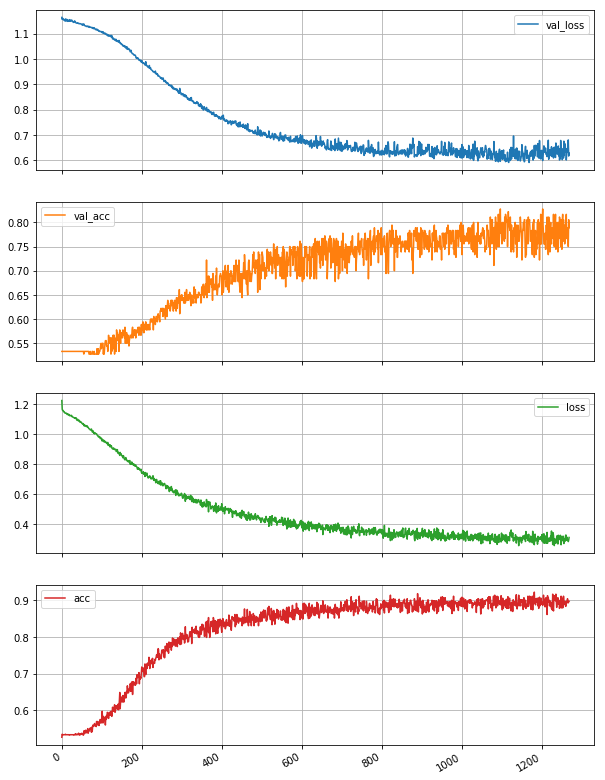

In [10]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [11]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [12]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10)) #y is prediction,j is the label 
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax(): 
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "XXXXXXXX")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "XXXXXXXX")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 21  Correct :79
Testing Accuracy: 79.0
